In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np


In [2]:
customer_history = pd.read_csv('customer_history.csv')

# creat list of RFA names, to use later for feature extraction
feature_vector=['Recency_log','Frequency_log','Amount_log']

#extract values from customer_history, obtaining a 3921*3 array
X=customer_history[feature_vector].values

#Scaling features
scaler=preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

Let's look for the optimal number of clusters with the elbow method

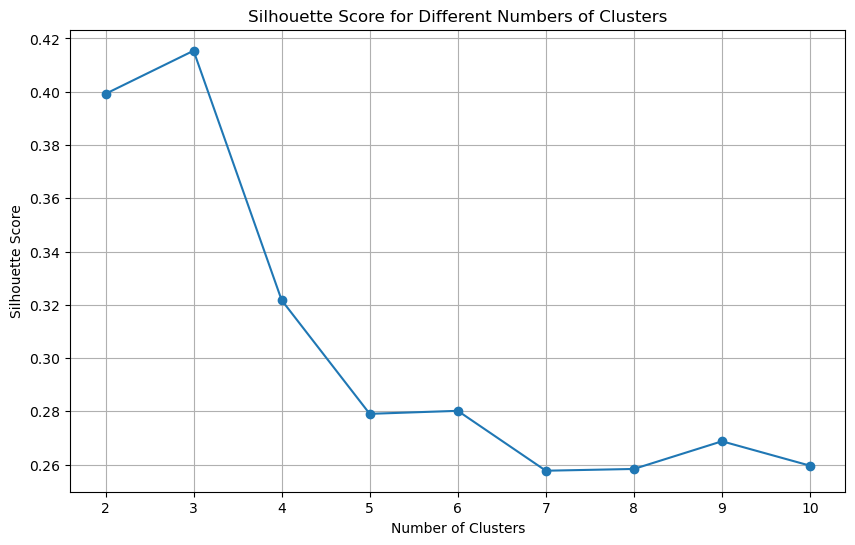

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



# Define a range of cluster numbers to test
cluster_range = range(2, 11)  # Testing clusters from 2 to 10

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create a plot of silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()


optimal number of cluster is 4

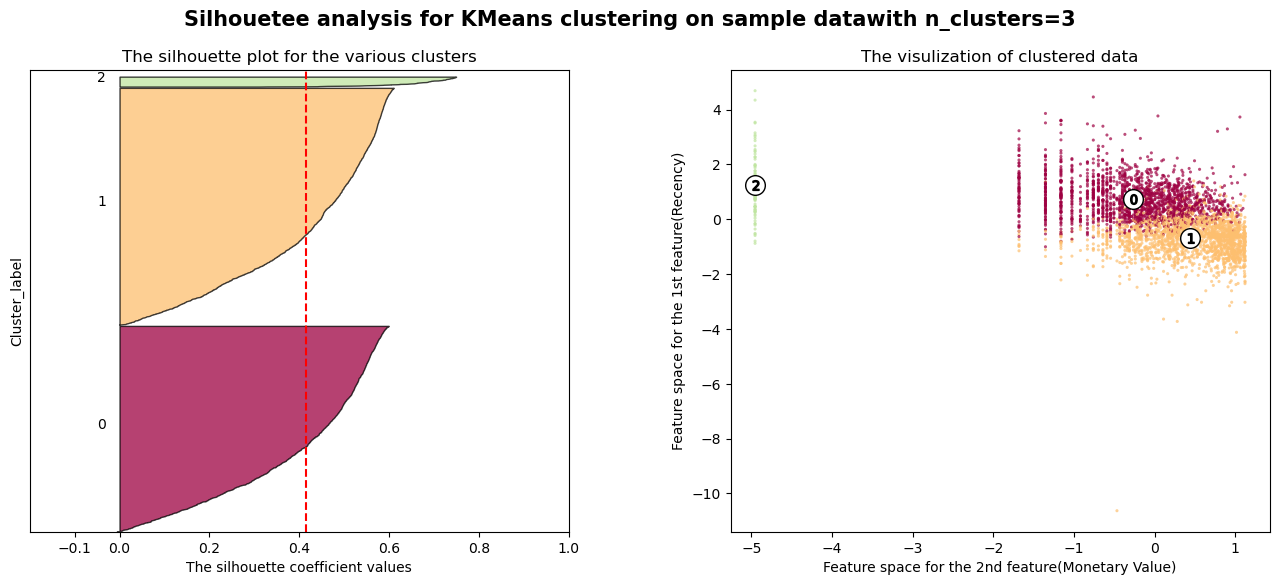

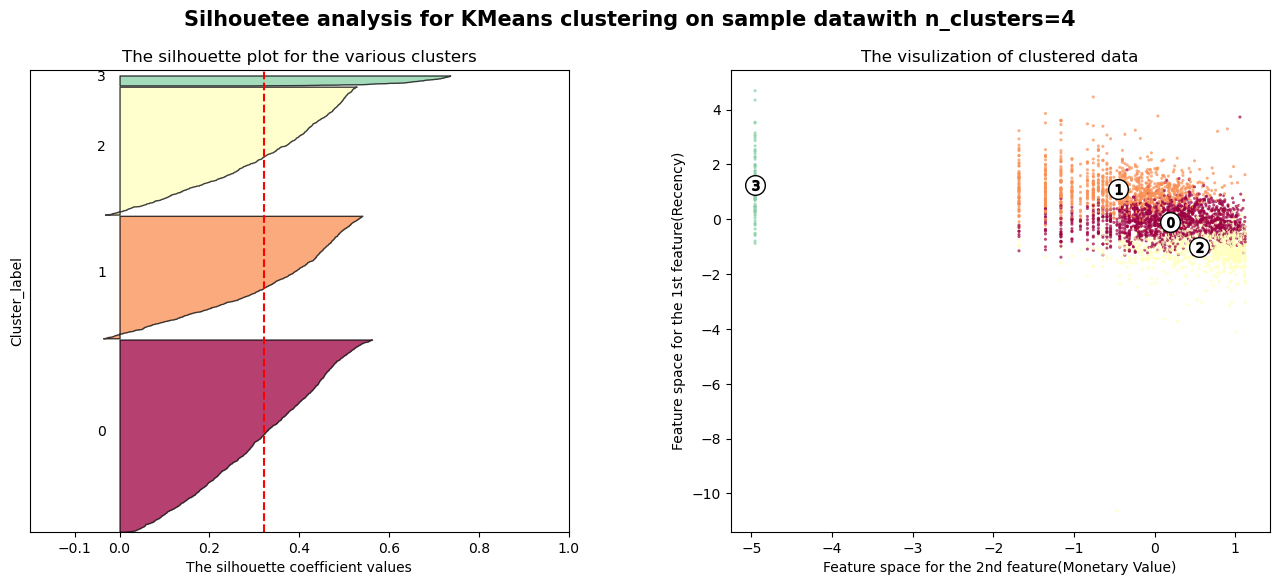

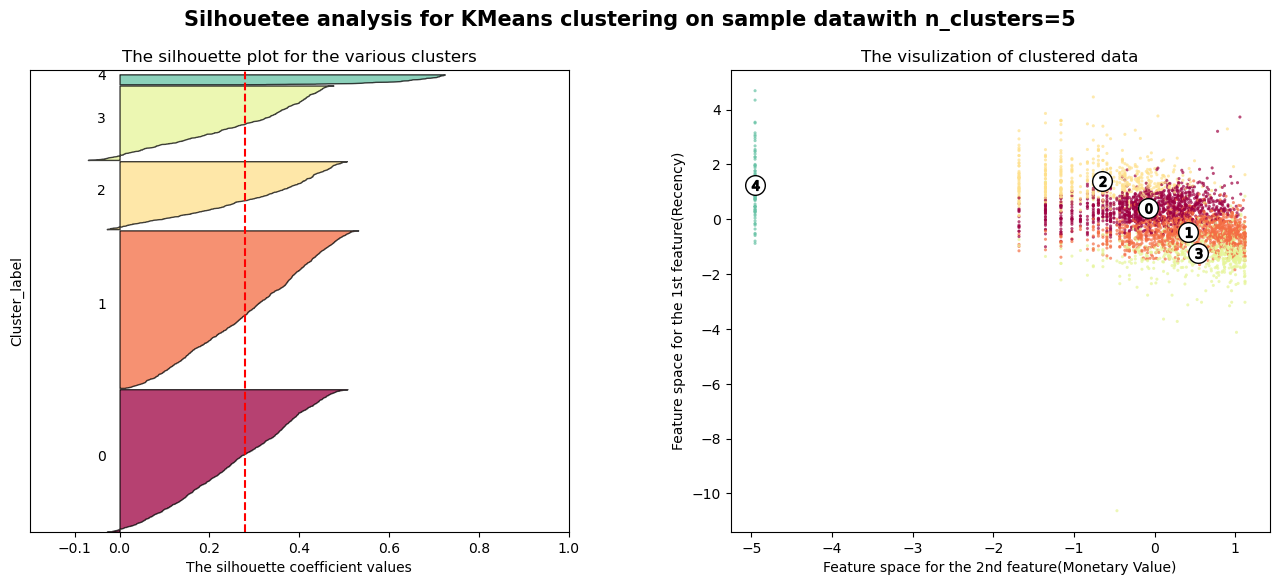

In [4]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score
X=X_scaled
cluster_centers = dict()
for n_clusters in range(3,6,1):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Adjust the positions of the subplots
    plt.subplots_adjust(wspace=0.3)  # Adjust the width space between subplots
    
    ax1, ax2 = axes[0], axes[1]  # Retrieve the two subplot axes
    
    ax1.set_xlim([-0.2,1])
    ax1.set_ylim([0,4000])
    
    clusterer_j = KMeans(n_clusters=n_clusters, random_state=50, n_init=10)  # initialize KMeans twice for clusterer_1: n_clusters=3
                                                                             #             clusterer_2: n_clusters=5
    
    cluster_labels=clusterer_j.fit_predict(X)  #  returns array with same dimention as X where each element
                                             #  indicates the cluster assignment for a given data point
    
    silhouette_avg=silhouette_score(X,cluster_labels)    #eval metric
    
    cluster_centers.update({n_clusters:{'cluster_center':clusterer_j.cluster_centers_,
                                       'silhouette_score':silhouette_avg,
                                       'labels':cluster_labels}
                           })
    
    sample_silhouette_values=silhouette_samples(X,cluster_labels) #computes the silhouette coefficients for each data point 
    y_lower=0
    for i in range(n_clusters):
        
        #silhouette values of data points associated to cluster i (array)
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i] 
                                                                                   
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]  #number of datapointsassociated to cluster i
        y_upper = y_lower + size_cluster_i
    
        cmap = cm.Spectral

        color = cmap(float(i)/n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,
                ith_cluster_silhouette_values,facecolor=color,edgecolor='black',alpha=0.75) #fill between x=o to x=ith_cluster_silhouette_values
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # x and y position for the text 'i' (y in the middle)
        y_lower = y_upper + 10 # 10 for 0 samples
              
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster_label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    colors=cmap(cluster_labels.astype(float)/n_clusters)
    feature1=0
    feature2=2
    
    #scatter plot of Recency agaisnt Monetary value
    ax2.scatter(X[:,feature1],X[:,feature2],marker='.',s=20,
                    lw=0,alpha=0.7,c=colors)
    
    centers=clusterer_j.cluster_centers_  #array containing centers for each cluster
    
    ax2.scatter(centers[:,feature1],centers[:,feature2],marker="o",
                   alpha=1,c='white',s=200,edgecolor='k')
    
    for i,c in enumerate(centers):    # c is an array, i is the endex indicating the cluster
        
        ax2.scatter(c[feature1],c[feature2],marker='$%d$'%i,alpha=1,
                       edgecolor='black',s=50)
        
    ax2.set_title('The visulization of clustered data')
    ax2.set_xlabel('Feature space for the 2nd feature(Monetary Value)')
    ax2.set_ylabel('Feature space for the 1st feature(Recency)')
    plt.suptitle('Silhouetee analysis for KMeans clustering on sample data' 'with n_clusters=%d'
                         % n_clusters,fontsize=15,fontweight='bold')
    plt.show()

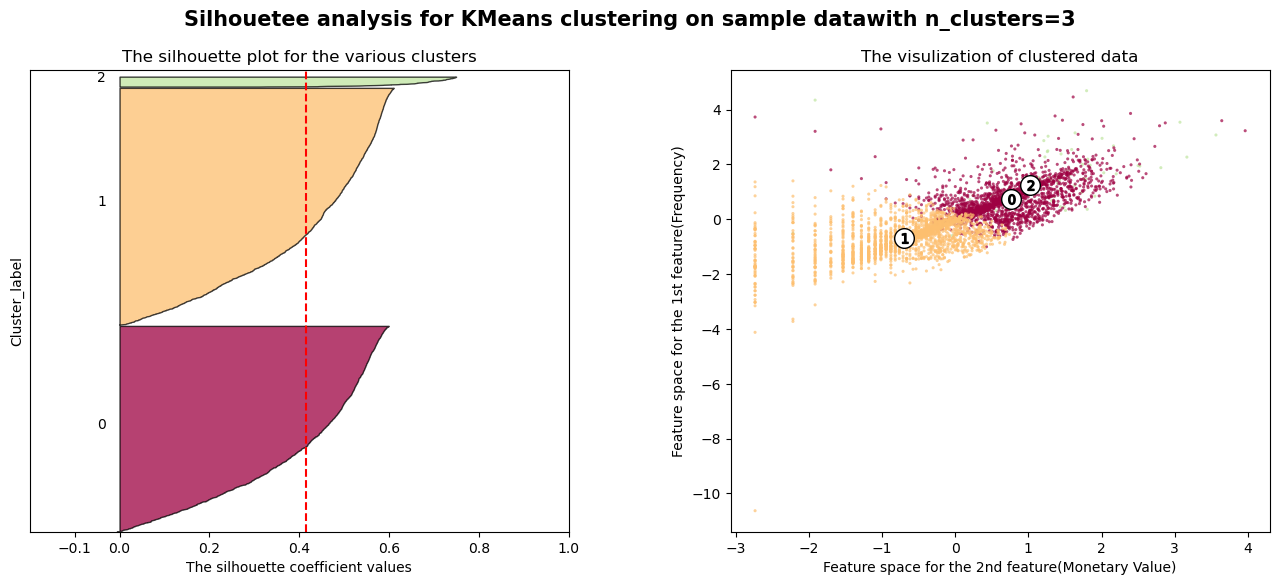

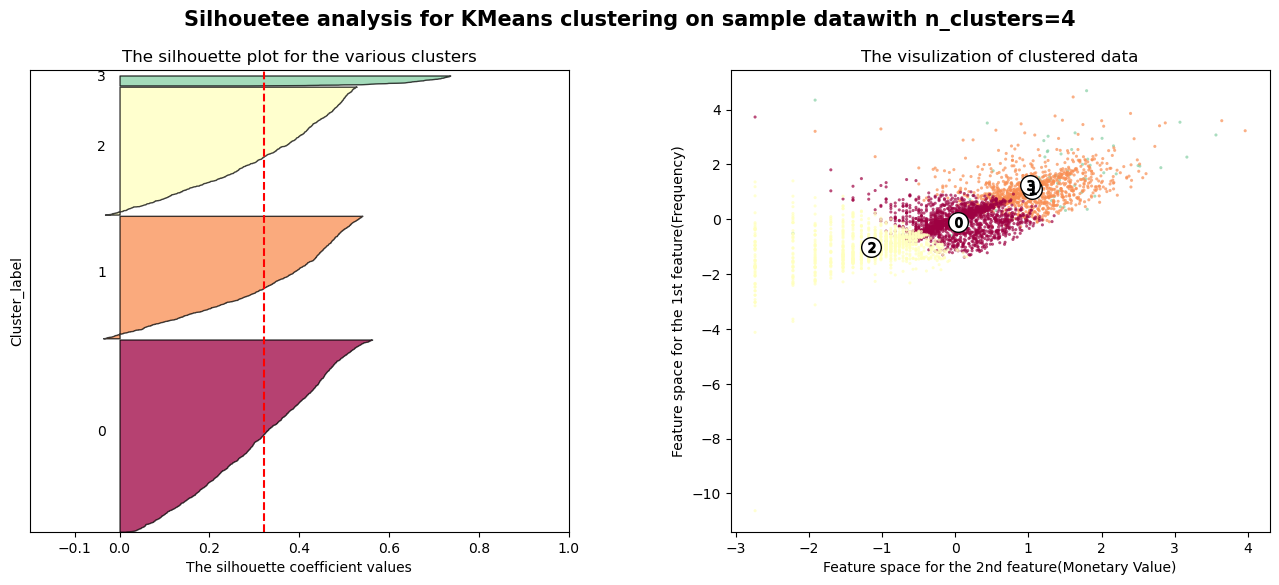

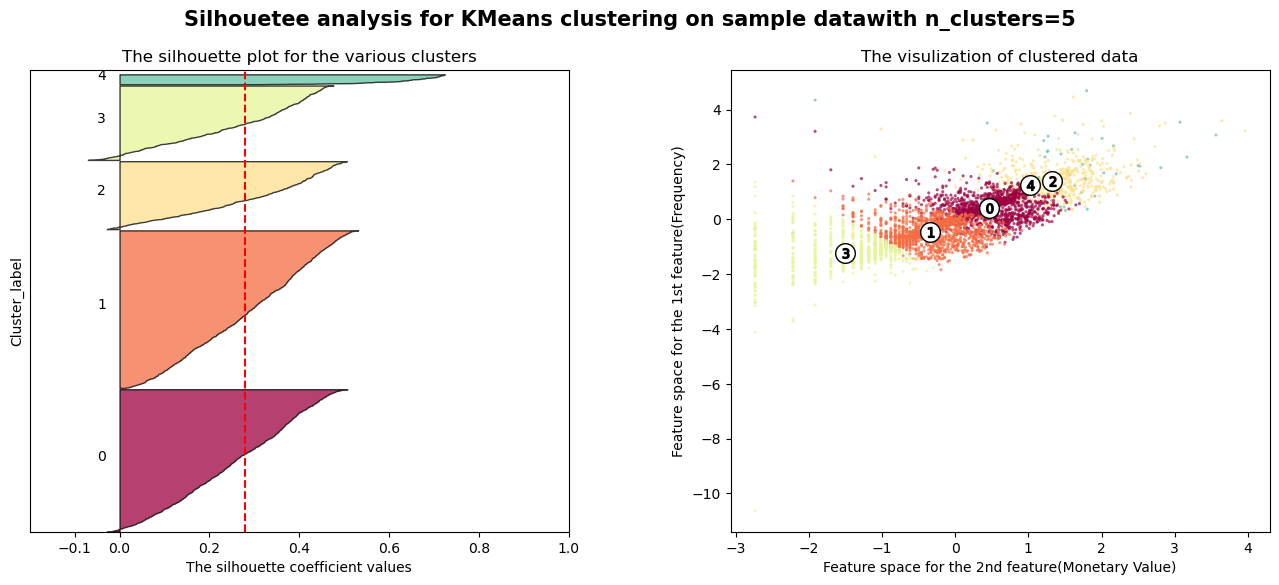

In [5]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score
X=X_scaled
cluster_centers = dict()
for n_clusters in range(3,6,1):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Adjust the positions of the subplots
    plt.subplots_adjust(wspace=0.3)  # Adjust the width space between subplots
    
    ax1, ax2 = axes[0], axes[1]  # Retrieve the two subplot axes
    
    ax1.set_xlim([-0.2,1])
    ax1.set_ylim([0,4000])
    
    clusterer_j = KMeans(n_clusters=n_clusters, random_state=50, n_init=10)  # initialize KMeans twice for clusterer_1: n_clusters=3
                                                                             #             clusterer_2: n_clusters=5
    
    cluster_labels=clusterer_j.fit_predict(X)  #  returns array with same dimention as X where each element
                                             #  indicates the cluster assignment for a given data point
    
    silhouette_avg=silhouette_score(X,cluster_labels)    #eval metric
    
    cluster_centers.update({n_clusters:{'cluster_center':clusterer_j.cluster_centers_,
                                       'silhouette_score':silhouette_avg,
                                       'labels':cluster_labels}
                           })
    
    sample_silhouette_values=silhouette_samples(X,cluster_labels) #computes the silhouette coefficients for each data point 
    y_lower=0
    for i in range(n_clusters):
        
        #silhouette values of data points associated to cluster i (array)
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i] 
                                                                                   
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]  #number of datapointsassociated to cluster i
        y_upper = y_lower + size_cluster_i
    
        cmap = cm.Spectral

        color = cmap(float(i)/n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,
                ith_cluster_silhouette_values,facecolor=color,edgecolor='black',alpha=0.75) #fill between x=o to x=ith_cluster_silhouette_values
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # x and y position for the text 'i' (y in the middle)
        y_lower = y_upper + 10 # 10 for 0 samples
              
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster_label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    colors=cmap(cluster_labels.astype(float)/n_clusters)
    feature1=1
    feature2=2
    
    #scatter plot of Recency agaisnt Monetary value
    ax2.scatter(X[:,feature1],X[:,feature2],marker='.',s=20,
                    lw=0,alpha=0.7,c=colors)
    
    centers=clusterer_j.cluster_centers_  #array containing centers for each cluster
    
    ax2.scatter(centers[:,feature1],centers[:,feature2],marker="o",
                   alpha=1,c='white',s=200,edgecolor='k')
    
    for i,c in enumerate(centers):    # c is an array, i is the endex indicating the cluster
        
        ax2.scatter(c[feature1],c[feature2],marker='$%d$'%i,alpha=1,
                       edgecolor='black',s=50)
        
    ax2.set_title('The visulization of clustered data')
    ax2.set_xlabel('Feature space for the 2nd feature(Monetary Value)')
    ax2.set_ylabel('Feature space for the 1st feature(Frequency)')
    plt.suptitle('Silhouetee analysis for KMeans clustering on sample data' 'with n_clusters=%d'
                         % n_clusters,fontsize=15,fontweight='bold')
    plt.show()

In [6]:
for i in range(3,6,1):
    print('for {} number of clusters'.format(i))
    cent_transformed=scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print('Silhouette score for cluster {} is {}'.format(i,cluster_centers[i]['silhouette_score']))

for 3 number of clusters
   Recency_log  Frequency_log   Amount_log
0    19.803487     107.940064  1778.956491
1    88.452113      15.168254   285.780490
2     0.001000     152.953346  3324.983338
Silhouette score for cluster 3 is 0.41539458167439647
for 4 number of clusters
   Recency_log  Frequency_log   Amount_log
0    51.457428      41.328258   619.672544
1    13.291247     158.997220  2777.613816
2   110.930558       8.285700   190.652262
3     0.001000     152.953346  3324.983338
Silhouette score for cluster 4 is 0.32183488225042983
for 5 number of clusters
   Recency_log  Frequency_log   Amount_log
0    29.675728      72.215691  1160.301848
1    83.092073      24.510479   378.532095
2     8.719235     228.299053  4105.575951
3   109.121755       5.197411   146.349154
4     0.001000     152.953346  3324.983338
Silhouette score for cluster 5 is 0.2786251089757605
